In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [3]:
data = pd.read_csv('https://raw.githubusercontent.com/wri/global-power-plant-database/master/source_databases_csv/database_IND.csv')

In [4]:
data.head()

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,generation_data_source,estimated_generation_gwh
0,IND,India,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,IND,India,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,IND,India,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,NaN,NaN,...,2019.0,NaN,617.789264,843.747,886.004428,663.774500,626.239128,NaN,Central Electricity Authority,NaN
4,IND,India,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,Oil,NaN,...,2019.0,NaN,3035.550000,5916.370,6243.000000,5385.579736,7279.000000,NaN,Central Electricity Authority,NaN


In [5]:
data.shape

(907, 27)

In [6]:
data.columns

Index(['country', 'country_long', 'name', 'gppd_idnr', 'capacity_mw',
       'latitude', 'longitude', 'primary_fuel', 'other_fuel1', 'other_fuel2',
       'other_fuel3', 'commissioning_year', 'owner', 'source', 'url',
       'geolocation_source', 'wepp_id', 'year_of_capacity_data',
       'generation_gwh_2013', 'generation_gwh_2014', 'generation_gwh_2015',
       'generation_gwh_2016', 'generation_gwh_2017', 'generation_gwh_2018',
       'generation_gwh_2019', 'generation_data_source',
       'estimated_generation_gwh'],
      dtype='object')

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 907 entries, 0 to 906
Data columns (total 27 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   country                   907 non-null    object 
 1   country_long              907 non-null    object 
 2   name                      907 non-null    object 
 3   gppd_idnr                 907 non-null    object 
 4   capacity_mw               907 non-null    float64
 5   latitude                  861 non-null    float64
 6   longitude                 861 non-null    float64
 7   primary_fuel              907 non-null    object 
 8   other_fuel1               198 non-null    object 
 9   other_fuel2               1 non-null      object 
 10  other_fuel3               0 non-null      float64
 11  commissioning_year        527 non-null    float64
 12  owner                     342 non-null    object 
 13  source                    907 non-null    object 
 14  url       

In [8]:
 data.isna().sum()

country                       0
country_long                  0
name                          0
gppd_idnr                     0
capacity_mw                   0
latitude                     46
longitude                    46
primary_fuel                  0
other_fuel1                 709
other_fuel2                 906
other_fuel3                 907
commissioning_year          380
owner                       565
source                        0
url                           0
geolocation_source           19
wepp_id                     907
year_of_capacity_data       388
generation_gwh_2013         907
generation_gwh_2014         509
generation_gwh_2015         485
generation_gwh_2016         473
generation_gwh_2017         467
generation_gwh_2018         459
generation_gwh_2019         907
generation_data_source      458
estimated_generation_gwh    907
dtype: int64

In [9]:
data['latitude'] = data['latitude'].fillna(data['latitude'].mean())
data['longitude'] = data['longitude'].fillna(data['longitude'].mean())
data['geolocation_source'] = data['geolocation_source'].fillna(data['geolocation_source'].mode()[0])

In [10]:
data = data.drop(columns=['other_fuel1'])
data = data.drop(columns=['other_fuel2'])
data = data.drop(columns=['other_fuel3'])
data = data.drop(columns=['commissioning_year'])
data = data.drop(columns=['owner'])
data = data.drop(columns=['wepp_id'])
data = data.drop(columns=['year_of_capacity_data'])
data = data.drop(columns=['generation_gwh_2013'])
data = data.drop(columns=['generation_gwh_2014'])
data = data.drop(columns=['generation_gwh_2015'])
data = data.drop(columns=['generation_gwh_2016'])
data = data.drop(columns=['generation_gwh_2017'])
data = data.drop(columns=['generation_gwh_2018'])
data = data.drop(columns=['generation_gwh_2019'])
data = data.drop(columns=['generation_data_source'])
data = data.drop(columns=['estimated_generation_gwh'])

In [11]:
data.isna().sum()

country               0
country_long          0
name                  0
gppd_idnr             0
capacity_mw           0
latitude              0
longitude             0
primary_fuel          0
source                0
url                   0
geolocation_source    0
dtype: int64

In [12]:
data.shape

(907, 11)

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 907 entries, 0 to 906
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   country             907 non-null    object 
 1   country_long        907 non-null    object 
 2   name                907 non-null    object 
 3   gppd_idnr           907 non-null    object 
 4   capacity_mw         907 non-null    float64
 5   latitude            907 non-null    float64
 6   longitude           907 non-null    float64
 7   primary_fuel        907 non-null    object 
 8   source              907 non-null    object 
 9   url                 907 non-null    object 
 10  geolocation_source  907 non-null    object 
dtypes: float64(3), object(8)
memory usage: 78.1+ KB


In [14]:
from sklearn.preprocessing import LabelEncoder

In [15]:
lab_enc = LabelEncoder()

In [16]:
data1 = lab_enc.fit_transform(data['country'])
data2 = lab_enc.fit_transform(data['country_long'])
data3 = lab_enc.fit_transform(data['name'])
data4 = lab_enc.fit_transform(data['gppd_idnr'])
data5 = lab_enc.fit_transform(data['primary_fuel'])
data6 = lab_enc.fit_transform(data['source'])
data7 = lab_enc.fit_transform(data['url'])
data8 = lab_enc.fit_transform(data['geolocation_source'])

In [17]:
data['country'] = data1
data['country_long'] = data2
data['name'] = data3
data['gppd_idnr'] = data4
data['primary_fuel'] = data5
data['source'] = data6
data['url'] = data7
data['geolocation_source'] = data8

In [18]:
data.head()

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,source,url,geolocation_source
0,0,0,0,657,2.5,28.1839,73.2407,6,109,128,1
1,0,0,1,519,98.0,24.7663,74.6090,1,174,173,2
2,0,0,2,853,39.2,21.9038,69.3732,7,21,205,2
3,0,0,3,0,135.0,23.8712,91.3602,2,22,58,2
4,0,0,4,1,1800.0,21.9603,82.4091,1,22,58,2


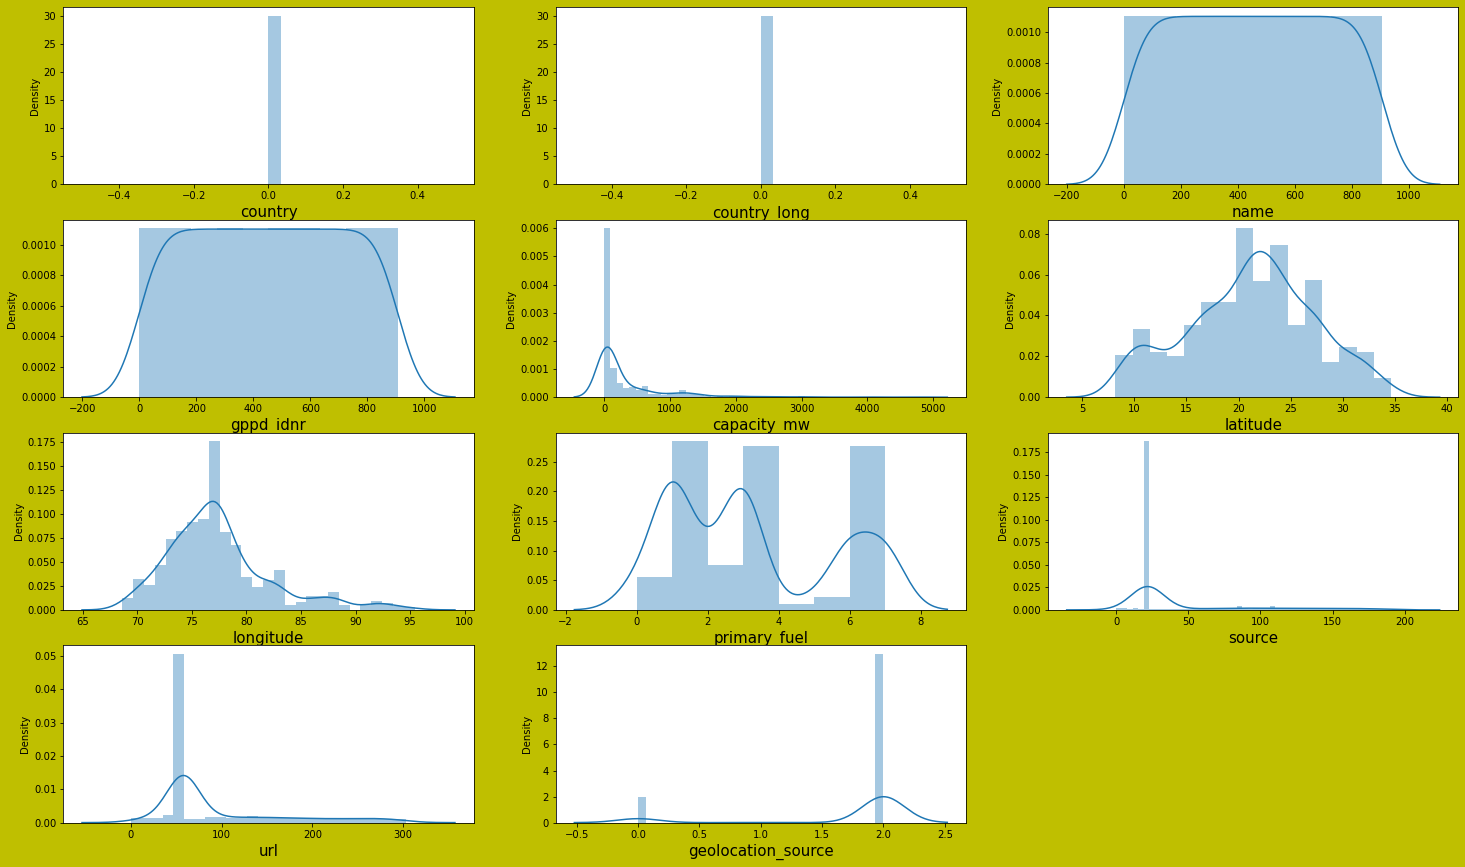

In [19]:
plt.figure(figsize = (25,15),facecolor = 'y')
plot = 1


for column in data:
    
    if plot <= 12:
        
        ax = plt.subplot(4,3,plot)
        sns.distplot(data[column])
        plt.xlabel(column,fontsize=15)
        
    plot+=1
    
plt.show()    

In [20]:
q1 = data.quantile(0.25)
q3 = data.quantile(0.75)

In [21]:
iqr = q3-q1

In [22]:
longitude_low = (q1.longitude-(1.5*iqr.longitude))
index = np.where(data['longitude']<longitude_low)
data = data.drop(data.index[index])
data.reset_index()

,index,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,source,url,geolocation_source
0,0,0,0,0,657,2.5,28.1839,73.2407,6,109,128,1
1,1,0,0,1,519,98.0,24.7663,74.6090,1,174,173,2
2,2,0,0,2,853,39.2,21.9038,69.3732,7,21,205,2
3,3,0,0,3,0,135.0,23.8712,91.3602,2,22,58,2
4,4,0,0,4,1,1800.0,21.9603,82.4091,1,22,58,2
...,...,...,...,...,...,...,...,...,...,...,...,...
902,902,0,0,902,491,1600.0,16.2949,77.3568,1,22,58,2
903,903,0,0,903,822,3.0,12.8932,78.1654,6,77,22,0
904,904,0,0,904,891,25.5,15.2758,75.5811,7,21,260,2
905,905,0,0,905,539,80.0,24.3500,73.7477,1,59,82,2


In [23]:
longitude_high = (q1.longitude+(1.5*iqr.longitude))
index = np.where(data['longitude']>longitude_high)
data = data.drop(data.index[index])
data.reset_index()

,index,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,source,url,geolocation_source
0,0,0,0,0,657,2.5,28.1839,73.2407,6,109,128,1
1,1,0,0,1,519,98.0,24.7663,74.6090,1,174,173,2
2,2,0,0,2,853,39.2,21.9038,69.3732,7,21,205,2
3,5,0,0,5,2,250.0,23.7689,68.6447,1,22,58,2
4,6,0,0,6,3,60.0,10.4547,77.0078,3,22,58,2
...,...,...,...,...,...,...,...,...,...,...,...,...
751,902,0,0,902,491,1600.0,16.2949,77.3568,1,22,58,2
752,903,0,0,903,822,3.0,12.8932,78.1654,6,77,22,0
753,904,0,0,904,891,25.5,15.2758,75.5811,7,21,260,2
754,905,0,0,905,539,80.0,24.3500,73.7477,1,59,82,2


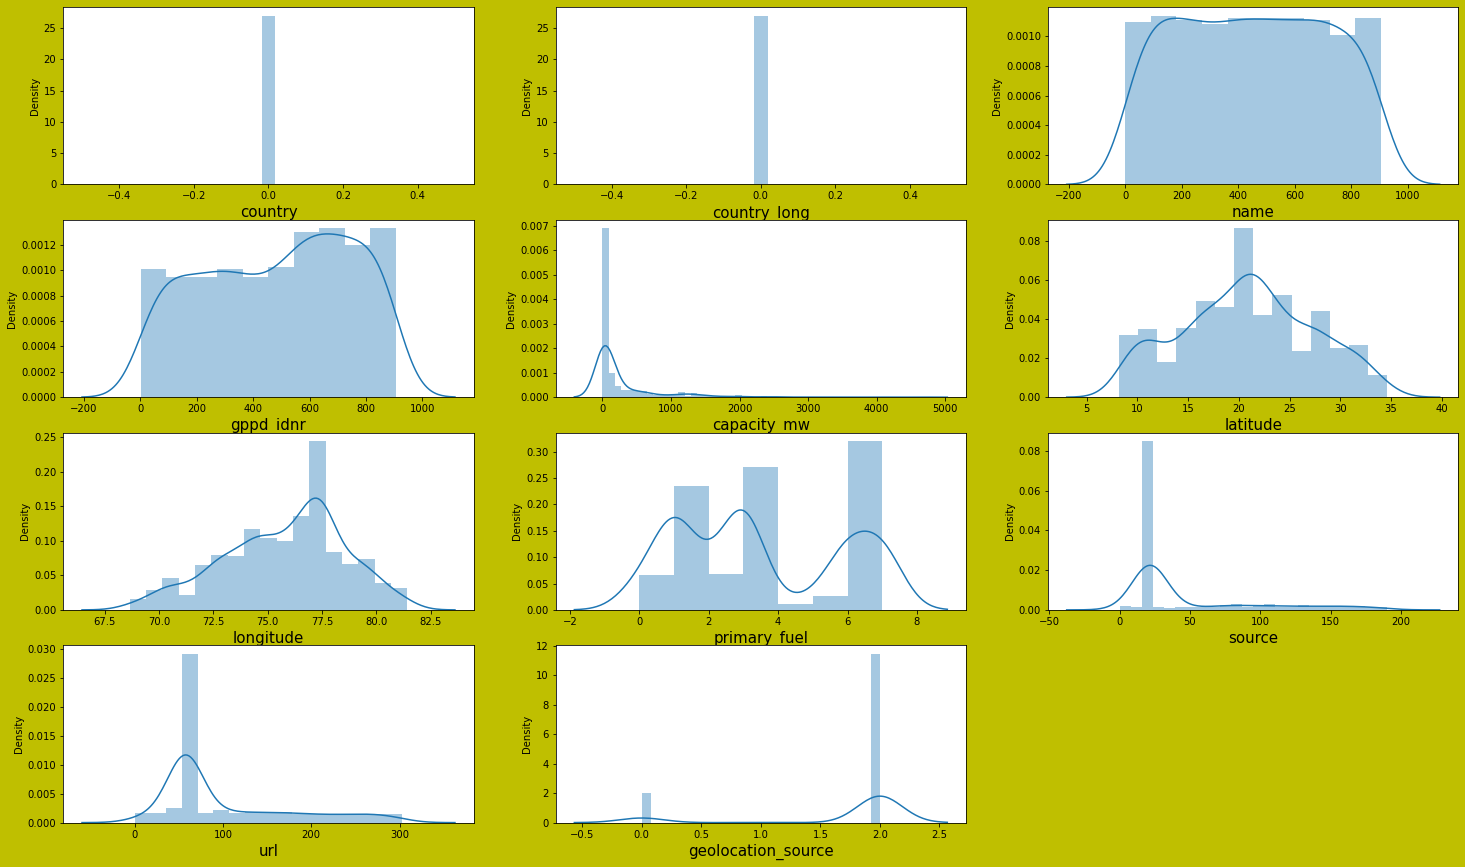

In [24]:
plt.figure(figsize = (25,15),facecolor = 'y')
plot = 1


for column in data:
    
    if plot <= 12:
        
        ax = plt.subplot(4,3,plot)
        sns.distplot(data[column])
        plt.xlabel(column,fontsize=15)
        
    plot+=1
    
plt.show()    

In [25]:
x = data.drop(columns=['capacity_mw'])
y = data.capacity_mw

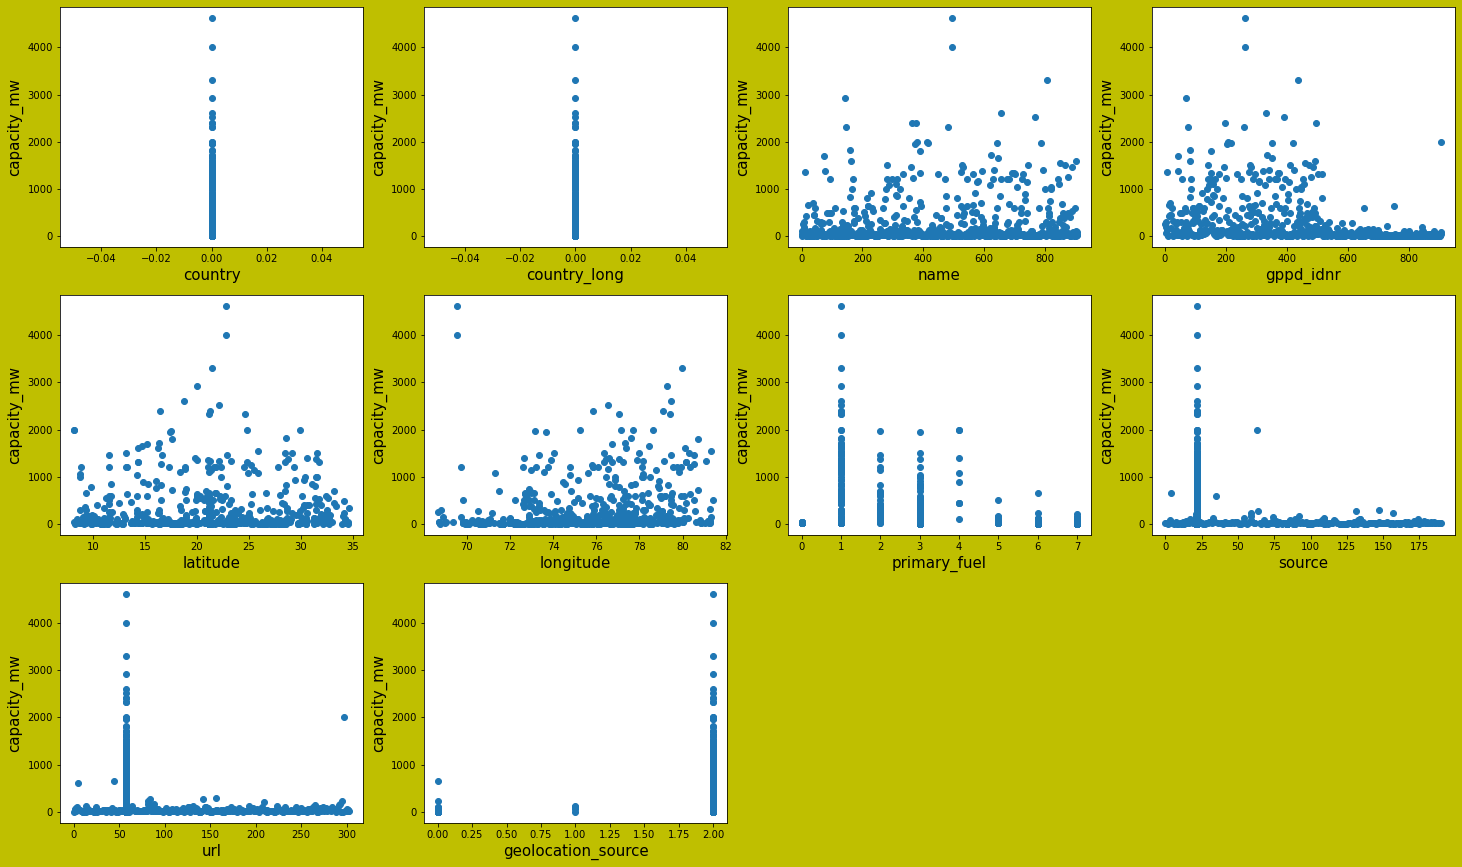

In [26]:
plt.figure(figsize = [25,15],facecolor = 'y')
plotnumber = 1

for column in x:
    if plotnumber <= 12:
        ax = plt.subplot(3,4,plotnumber)
        plt.scatter(x[column],y)
        plt.xlabel(column,fontsize=15)
        plt.ylabel('capacity_mw',fontsize=15)
    plotnumber+=1
    
plt.show()    

In [27]:
from sklearn.preprocessing import StandardScaler 

In [28]:
scalar = StandardScaler()

In [29]:
x_scaled = scalar.fit_transform(x)

In [30]:
x_scaled

array([[ 0.        ,  0.        , -1.73088328, ...,  1.30797661,
         0.35523155, -0.98826262],
       [ 0.        ,  0.        , -1.7270498 , ...,  2.68659551,
         0.95560798,  0.4214101 ],
       [ 0.        ,  0.        , -1.72321631, ..., -0.55846129,
         1.38254233,  0.4214101 ],
       ...,
       [ 0.        ,  0.        ,  1.73458492, ..., -0.55846129,
         2.11633575,  0.4214101 ],
       [ 0.        ,  0.        ,  1.7384184 , ...,  0.24750053,
        -0.25848659,  0.4214101 ],
       [ 0.        ,  0.        ,  1.74225189, ..., -0.55846129,
         1.91621028,  0.4214101 ]])

In [31]:
from sklearn.model_selection import train_test_split

In [32]:
x_train,x_test,y_train,y_test = train_test_split(x_scaled,y,test_size = 0.25,random_state=70)

In [47]:
from sklearn.tree import DecisionTreeRegressor

In [48]:
dt = DecisionTreeRegressor()

In [49]:
dt.fit(x_train,y_train)

DecisionTreeRegressor()

In [50]:
dt.score(x_train,y_train)

1.0

In [51]:
dt.score(x_test,y_test)

0.24091618082958166

In [52]:
from sklearn.ensemble import RandomForestRegressor

In [53]:
rf = RandomForestRegressor()

In [54]:
rf.fit(x_train,y_train)

RandomForestRegressor()

In [55]:
rf.score(x_train,y_train)

0.905837011014147

In [56]:
rf.score(x_test,y_test)

0.44784432439003186

In [57]:
from sklearn.ensemble import BaggingRegressor

In [58]:
bg = BaggingRegressor()

In [59]:
bg.fit(x_train,y_train)

BaggingRegressor()

In [60]:
bg.score(x_train,y_train)

0.8855797557226162

In [61]:
bg.score(x_test,y_test)

0.5437454140391706

In [73]:
y_pred = bg.predict(x_test)

In [66]:
from sklearn.ensemble import GradientBoostingRegressor

In [67]:
gra = GradientBoostingRegressor()

In [68]:
gra.fit(x_train,y_train)

GradientBoostingRegressor()

In [69]:
gra.score(x_train,y_train)

0.835814244330361

In [70]:
gra.score(x_test,y_test)

0.5255767925704262

In [71]:
### bagging regressor is the best model for the prediction of capacity_mw

In [72]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [74]:
mean_absolute_error(y_test,y_pred)

189.2796931216931

In [77]:
mean_squared_error(y_pred,y_test)

153966.20819003176

In [78]:
np.sqrt(mean_squared_error(y_pred,y_test))

392.3852802922553

In [79]:
x = data.drop(columns = ['primary_fuel'])
y = data.primary_fuel

In [82]:
x_scaled = scalar.fit_transform(x)

In [83]:
x_train,x_test,y_train,y_test = train_test_split(x_scaled,y,test_size = 0.25,random_state=72)

In [84]:
from sklearn.tree import DecisionTreeClassifier

In [85]:
dtc = DecisionTreeClassifier()

In [86]:
dtc.fit(x_train,y_train)

DecisionTreeClassifier()

In [87]:
y_pred = dtc.predict(x_test)

In [88]:
 from sklearn.metrics import classification_report,confusion_matrix

In [94]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.67      0.75      0.71         8
           1       0.70      0.67      0.69        49
           2       0.29      0.38      0.33        13
           3       0.80      0.78      0.79        51
           4       0.20      0.33      0.25         3
           5       0.33      0.12      0.18         8
           6       0.97      0.97      0.97        30
           7       0.96      1.00      0.98        27

    accuracy                           0.75       189
   macro avg       0.62      0.63      0.61       189
weighted avg       0.75      0.75      0.75       189



In [95]:
#decision tree classifier is the best model for the prediction of primary_fuel